In [1]:
# Checkout www.pygimli.org for more examples
%matplotlib inline


# Four-point sensitivities

In this example, we illustrate how to visualize the sensitivities of four-point
arrays. You can easily loop over the plotting command to create something like:
https://www.youtube.com/watch?v=lt1qV-2d5Ps


In [171]:
import numpy as np
import matplotlib.pyplot as plt
import pygimli as pg
import pygimli.meshtools as mt
from pygimli.physics import ert

We start by creating a ERT data container with three four-point arrays.



In [172]:
schemek= pg.load("aagradsurf.dat")

In [254]:
scheme = pg.load("aa13.dat")
# scheme.add(pg.load("aa6.dat"))
# scheme = ert.createData(elecs=np.linspace(start=0, stop=46, num=24),
#                            schemeName='slm')

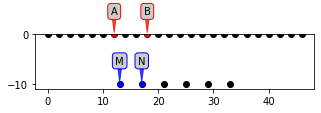

In [255]:
pos = {i+1 : np.array(scheme.sensorPosition(i)) for i in range(scheme.sensorCount())}

fig, ax = plt.subplots(figsize=(5, 1))
ax.plot([v[0] for _,v in pos.items()], [v[1] for _,v in pos.items()], 'ok')
ax.set_ylim(-11, 0)
plotABMN(ax, scheme, 1)

In [256]:
# scheme["k"] = ert.createGeometricFactors(scheme)
# scheme.save('schemek.dat')

Now we set up a 2D mesh.



In [257]:
# world = mt.createWorld(start=[-100, 0], end=[148, -100], worldMarker=True)
# for pos in scheme.sensorPositions():
#     world.createNode(pos)

# meshk = mt.createMesh(world, area=0.1, quality=33, marker=1)
# pg.show(mesh)

(<AxesSubplot:>, None)

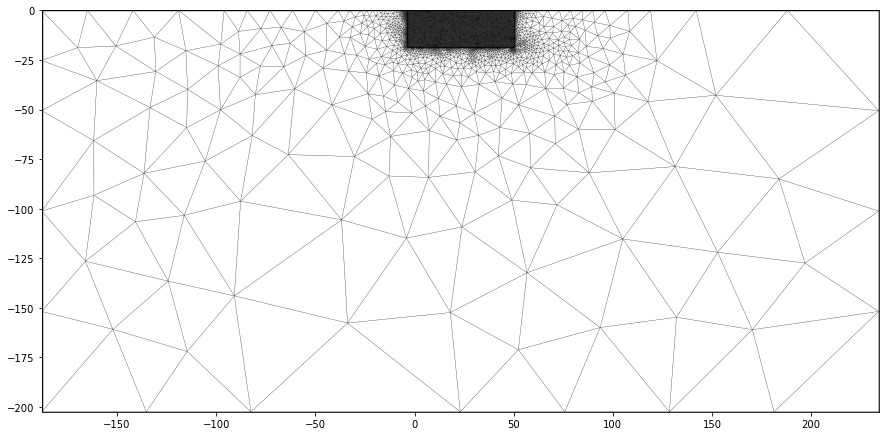

In [258]:
geok=pg.meshtools.createParaMeshPLC(schemek,paraMaxCellSize=0.05)
for p in scheme.sensors():
    geok.createNode(p)
    geok.createNode(p - [0, 0.1])
meshk = pg.meshtools.createMesh(geok, quality=34)
fig, ax = plt.subplots(figsize=(15, 8))
pg.show(meshk, ax=ax, markers=False)

In [259]:
hom = ert.simulate(meshk, res=1.0, scheme=scheme, sr=False,
                   calcOnly=True, verbose=True)
#hom['k'] = ert.createGeometricFactors(data, numerical=True) #calculate k numerically = foward simulation on a homogeneous model with a fine mesh and accounting for this topography https://www.youtube.com/watch?v=w3pu0H3dXe8


hom.save('homogeneous.ohm', 'a b m n u')
#k')

1

In [260]:
scheme.set('k', 1.0/ (hom('u') / hom('i')))
# data.set('rhoa', data('k') * data('u') / data('i'))
# data['err'] = ert.estimateError(data, absoluteUError=5e-5, relativeError=0.03) #50microV et 3%

# data.save('test.dat', 'a b m n rhoa k u i err')

# np.testing.assert_approx_equal(het('rhoa')[0], 9.5, 1)

In [261]:
# fig, ax = plt.subplots()
# ax.violinplot(scheme['k'])
# plt.grid(axis='y')
# ax.set_ylim(-10000,10000)
# plt.savefig('TOF/16bis.pdf', bbox_inches='tight', pad_inches=0.05)

In [262]:
b = int(2 * ((np.percentile(scheme['k'], 75)-np.percentile(scheme['k'], 25))/np.cbrt(len(scheme['k']))))
b

53

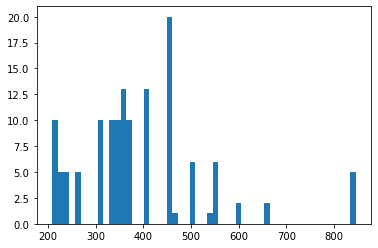

In [263]:
fig, ax = plt.subplots()
ax.hist(scheme['k'], bins=b);
# ax.set_xlim(-10000,10000)
plt.savefig('TOF/13.pdf', bbox_inches='tight', pad_inches=0.05)

In [264]:
np.histogram_bin_edges(scheme['k'])

array([208.24074831, 272.06915724, 335.89756617, 399.7259751 ,
       463.55438403, 527.38279296, 591.21120189, 655.03961082,
       718.86801975, 782.69642868, 846.52483761])

As a last step we invoke the ERT manager and calculate the Jacobian for a
homogeneous half-space.



In [ ]:
fop = ert.ERTModelling()
fop.setData(scheme)
fop.setMesh(mesh)

model = np.ones(mesh.cellCount())
fop.createJacobian(model)

Final visualization



In [5]:
def getABMN(scheme, idx):
    """ Get coordinates of four-point cfg with id `idx` from DataContainerERT
    `scheme`."""
    coords = {}
    for elec in "abmn":
        elec_id = int(scheme(elec)[idx])
        elec_pos = scheme.sensorPosition(elec_id)
        coords[elec] = elec_pos.x(), elec_pos.y()
    return coords


def plotABMN(ax, scheme, idx):
    """ Visualize four-point configuration on given axes. """
    coords = getABMN(scheme, idx)
    for elec in coords:
        x, y = coords[elec]
        if elec in "ab":
            color = "red"
        else:
            color = "blue"
        ax.plot(x, y, marker=".", color=color, ms=10)
        ax.annotate(elec.upper(), xy=(x, y), ha="center", fontsize=10, bbox=dict(
            boxstyle="round", fc=(0.8, 0.8, 0.8), ec=color), xytext=(0, 20),
                    textcoords='offset points', arrowprops=dict(
                        arrowstyle="wedge, tail_width=.5", fc=color, ec=color,
                        patchA=None, alpha=0.75))
        ax.plot(coords["a"][0],)

In [100]:
sensitivity = [(i[0], np.array(i[1])) for i in enumerate(fop.jacobian())]
pos = {i+1 : np.array(scheme.sensorPosition(i)) for i in range(scheme.sensorCount())}
# pos = {i+1 : np.array(scheme.sensorPosition(i)) for i in range(0,24)}

In [101]:
# i = 0 # look at the sensitivity of one array commence à 0 !!
# fig, ax = plt.subplots()#figsize=(10, 8))
# #
# ax.plot([v[0] for _,v in pos.items()], [v[1] for _,v in pos.items()], 'ok')
# # Electrode annotations
# plotABMN(ax, scheme, i)
# # Log-scaled and normalized sensitivity
# # normsens = pg.utils.logDropTol(sensitivity[i][1]/mesh.cellSizes(), 8e-4)
# # normsens /= max_max
# # pg.show(mesh, normsens, cMap="RdGy_r", ax=ax, orientation="vertical",
# #          label="Normalized\nsensitivity", nLevs=3, cMin=-1, cMax=1)
# # ax.set_ylim(-25, 0)

# #sensitivity
# # normsens = 100*pg.utils.logDropTol(sensitivity[i][1]/mesh.cellSizes(), 8e-4)
# # pg.show(mesh, normsens, cMap="jet", ax=ax, orientation="vertical",
# #              label="Sensitivity x 100")
# # ax.set_ylim(-25, 0)

(-15.0, 0.0)

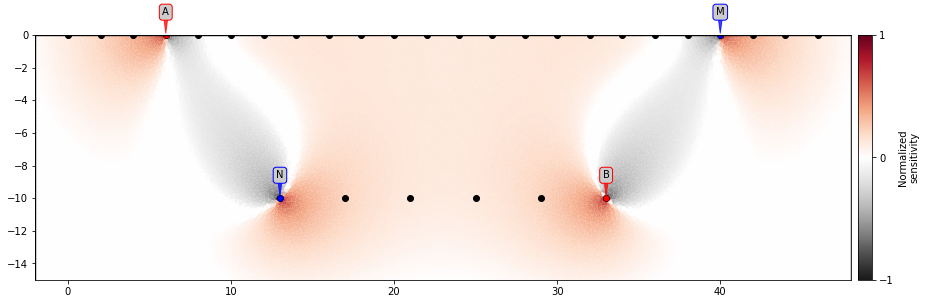

In [70]:
i = 11
fig, ax = plt.subplots(figsize=(15, 6))
#
ax.plot([v[0] for _,v in pos.items()], [v[1] for _,v in pos.items()], 'ok')
# Electrode annotations
plotABMN(ax, scheme, i)
normsens = pg.utils.logDropTol(sensitivity[i][1]/mesh.cellSizes(), 8e-4)
normsens /= np.max(normsens)
pg.show(mesh, normsens, cMap="RdGy_r", ax=ax, orientation="vertical",
            label="Normalized\nsensitivity", nLevs=3, cMin=-1, cMax=1)
ax.set_ylim(-15, 0)

(-15.0, 0.0)

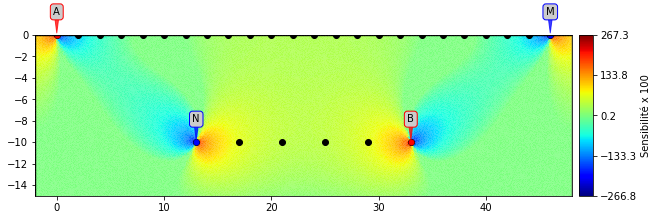

In [127]:
i = 39
fig, ax = plt.subplots(figsize=(10, 6))
#
ax.plot([v[0] for _,v in pos.items()], [v[1] for _,v in pos.items()], 'ok')
# Electrode annotations
plotABMN(ax, scheme, i)
normsens = 100*pg.utils.logDropTol(sensitivity[i][1]/mesh.cellSizes(), 8e-4)
pg.show(mesh, normsens, cMap="jet", ax=ax, orientation="vertical",
            label="Sensibilité x 100")
ax.set_ylim(-15, 0)
# plt.savefig('TOF/aa8sens3.pdf')

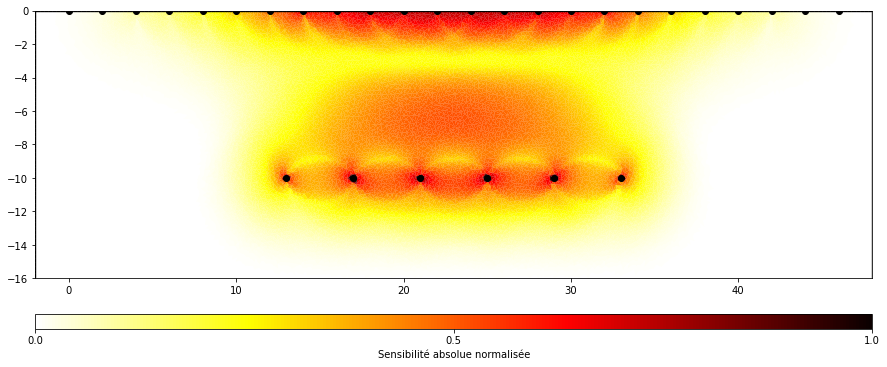

In [218]:
fig, ax = plt.subplots(figsize=(15,6))

totsens = pg.core.RVector(np.zeros(mesh.cellCount()))

for i in sensitivity:

    # Log-scaled and normalized sensitivity
    normsens = pg.utils.logDropTol(i[1]/mesh.cellSizes(), 8e-4)
    totsens += np.abs(normsens)
totsens /= np.max(np.abs(totsens))
pg.show(mesh, totsens, cMap="hot_r", ax=ax, orientation="horizontal",
        label="Sensibilité absolue normalisée", nLevs=3, cMin=0, cMax=1)
ax.plot([v[0] for _,v in pos.items()], [v[1] for _,v in pos.items()], 'ok')
ax.set_ylim(-16, 0)
plt.savefig('TOF/aa9absolue.pdf')